# Predicting yeilds.

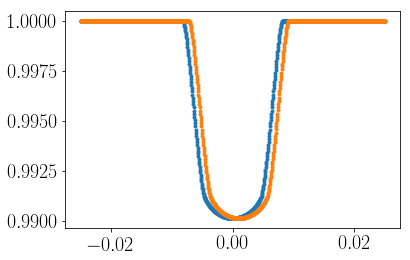

In [266]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

plt.plot(t, flux, ".")

params = batman.TransitParams()       #object to store transit parameters
params.t0 = .001                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

plt.plot(t, flux, ".")

There are 10^10 stars in the LMC and 5x10^9 stars in the SMC. The DEC detector has 62 chips, 4k x 4k. 16Mpixels. 10^5 stars per chip.

In [1]:
Nstars = 10**5 * 62
Nstars

6200000

Around 0.2% of stars have hot Jupiters.

In [2]:
NhotJs = .002 * Nstars
NhotJs

12400.0

But not all of these will transit.

In [159]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import batman
from tqdm import tqdm
from tqdm import trange

plotpar = {'axes.labelsize': 20,
           'font.size': 20,
           'legend.fontsize': 20,
           'xtick.labelsize': 20,
           'ytick.labelsize': 20,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [4]:
df = pd.read_csv("KOIs.csv", skiprows=53)
for i in df.keys():
    print(i)

loc_rowid
kepid
kepoi_name
kepler_name
koi_disposition
koi_pdisposition
koi_score
koi_fpflag_nt
koi_fpflag_ss
koi_fpflag_co
koi_fpflag_ec
koi_period
koi_period_err1
koi_period_err2
koi_time0bk
koi_time0bk_err1
koi_time0bk_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_depth_err2
koi_prad
koi_prad_err1
koi_prad_err2
koi_teq
koi_teq_err1
koi_teq_err2
koi_insol
koi_insol_err1
koi_insol_err2
koi_model_snr
koi_tce_plnt_num
koi_tce_delivname
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_srad
koi_srad_err1
koi_srad_err2
ra
dec
koi_kepmag


Select G stars and remove false positives.

In [5]:
m = df.koi_steff.values < 6000
m &= 5200 < df.koi_steff.values
m &= df.koi_pdisposition.values == "CANDIDATE"
m &= df.koi_disposition.values == "CONFIRMED"

m2 = df.koi_pdisposition.values == "CANDIDATE"
m2 &= df.koi_disposition.values == "CONFIRMED"

df_G = df.iloc[m]

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


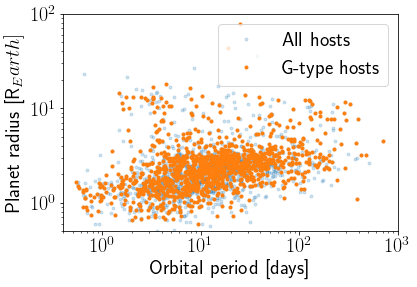

In [6]:
plt.loglog(df.koi_period.values[m2], df.koi_prad.values[m2], ".", alpha=.2, label="All hosts")
plt.loglog(df_G.koi_period, df_G.koi_prad, ".", label="G-type hosts")
plt.xlabel("Orbital period [days]")
plt.ylabel("Planet radius [R_Earth]")
plt.ylim(.5, 100)
plt.xlim(.4, 1000)
plt.legend()

Text(0,0.5,'Depth')

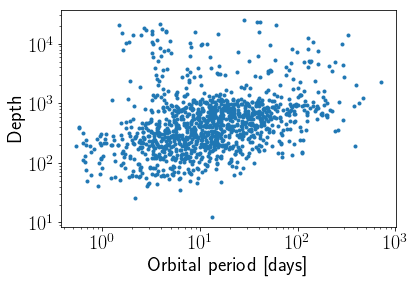

In [7]:
plt.loglog(df_G.koi_period, df_G.koi_depth, ".")
plt.xlabel("Orbital period [days]")
plt.ylabel("Depth")

114
9564


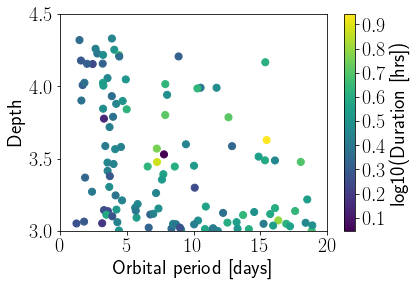

In [8]:
m = df_G.koi_period.values < 20
m &= np.log10(df_G.koi_depth) < 4.5
m &= 3 < np.log10(df_G.koi_depth)
plt.scatter(df_G.koi_period.values[m], np.log10(df_G.koi_depth.values[m]), 
            c=np.log10(df_G.koi_duration.values[m]), s=50)
plt.xlabel("Orbital period [days]")
plt.ylabel("Depth")
plt.ylim(3, 4.5)
plt.xlim(0, 20)
plt.colorbar(label="log10(Duration [hrs])")
print(sum(m))
print(len(df))

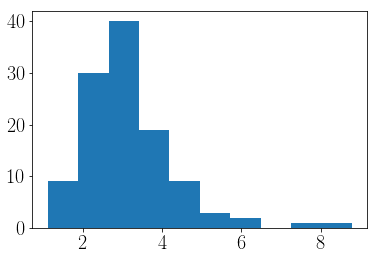

In [9]:
plt.hist(df_G.koi_duration.values[m]);

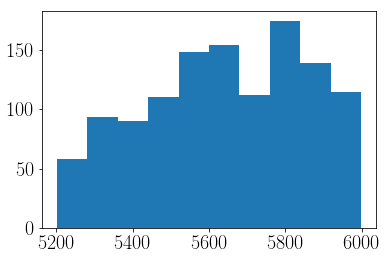

In [10]:
plt.hist(df_G.koi_steff);

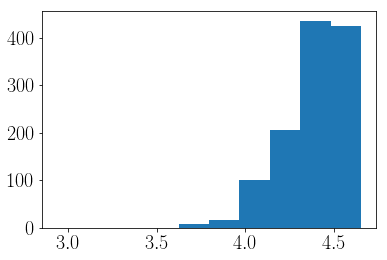

In [11]:
plt.hist(df_G.koi_slogg);

In [12]:
print(len(df.iloc[df.koi_disposition.values=="CONFIRMED"]))

2297


Cadence is around 5 minutes, 23.5 magnitude, S/N = 10. Minimum number of nights needed to observe 1/2 of these.
4 nights in a row is the minimum requirement - but to find subgiants longer baselines are needed. 5% precision.

look at distribution of orbital periods of CVs. Durations are 5 - 10%. 

Simulate a light curve.

In [13]:
import astropy.constants as co
import astropy.units as u

In [14]:
period_days = 1.  # period in days
cadence_minutes = 5  # cadence in minutes
radius = 2 * co.R_jup/co.R_sun  # 1 Jupiter radius in stellar radii
precision = 5  # percent

In [15]:
def make_light_curve(period_days, cadence_minutes, radius, precision, baseline=20):
    period_s = period_days * 24 * 3600
    period_s = period_s*u.s
    G = 6.67e-11
    M = 2e30
    a = (period_s**2*co.G*co.M_sun/(4*np.pi**2))**(1./3)/co.R_sun

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = period_days # period_days                   #orbital period
    params.rp = radius                       #planet radius (in units of stellar radii)
    params.a = a # (period_s**2*G*M/(4*np.pi**2))/6.955e8  #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                       #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = "nonlinear"        #limb darkening model
    params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

    cadence = cadence_minutes/(24*60)  # 30 minute cadence in days
    t = np.arange(0, baseline, cadence)  #times at which to calculate light curve [days]
    m = batman.TransitModel(params, t)    #initializes model

    flux = m.light_curve(params)          #calculates light curve

    f = flux + np.random.randn(len(t))*precision*1e-2
    
    return t, f

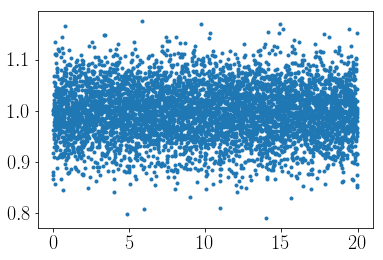

In [16]:
t, f = make_light_curve(period_days, cadence_minutes, radius, precision)
plt.plot(t, f, ".")

In [17]:
from astropy.stats import BoxLeastSquares

model = BoxLeastSquares(t, f, dy=precision*1e-2)
periodogram = model.autopower(0.2)

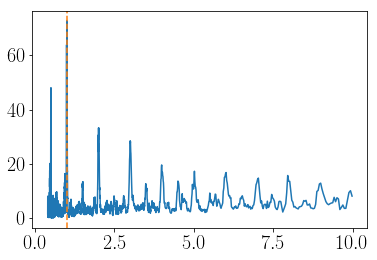

In [18]:
plt.plot(periodogram.period, periodogram.power)
plt.axvline(period_days, color="tab:orange", ls="--")

In [19]:
print(periodogram.period[periodogram.power == max(periodogram.power)][0])

1.0005212405485844


Now try a range of radii and orbital periods.

In [342]:
Ntrials = 24
Norbs = 10
Nrads = 8
porbs = 10**(np.linspace(.01, np.log10(20), Norbs))
radii = np.linspace(.5, 2, Nrads)*co.R_jup/co.R_sun
recovered, true_p = [np.zeros((Norbs, Nrads, Ntrials)) for i in range(2)]

print("porbs = ", porbs)
print("radii = ", radii)

for k in tqdm(range(Ntrials)):
    for i in range(Norbs):
        for j in range(Nrads):
            t, f = make_light_curve(porbs[i], cadence_minutes, radii[j], precision)
            model = BoxLeastSquares(t, f, dy=precision*1e-2)
            periodogram = model.autopower(0.2)
            recovered[i, j, k] = periodogram.period[periodogram.power == max(periodogram.power)][0]
            true_p[i, j, k] = porbs[i]
            
            # Make plots
            plt.plot(periodogram.period, periodogram.power)
            plt.axvline(porbs[i], color="tab:orange", ls="--")
            plt.savefig("plots/{0}{1}{2}".format(i, j, k))
            plt.close()
            plt.plot(t, f, ".")
            plt.savefig("plots/{0}{1}{2}_lc".format(i, j, k))
            plt.close()

  0%|          | 0/16 [00:00<?, ?it/s]

porbs =  [ 1.02329299  1.56470639  2.39257584  3.65846218  5.59411546  8.55390224
 13.07968061 20.        ]
radii =  [0.05138134 0.08221015 0.11303895 0.14386776 0.17469656 0.20552537]


100%|██████████| 16/16 [07:56<00:00, 29.42s/it]


Were the recovered periods within 10% of the injected ones?

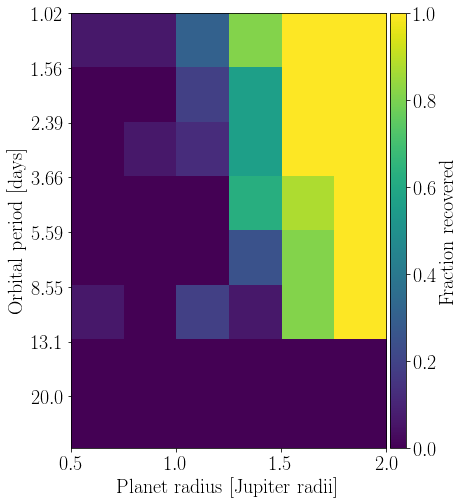

In [343]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

success = true_p/abs(true_p - recovered)
success_hist = np.zeros((Norbs, Nrads))

for i in range(Norbs):
    for j in range(Nrads):
        success = abs(true_p[i, j, :] - recovered[i, j, :])/true_p[i, j, :]
        s = success <= .1
        success_hist[i, j] = float(sum(s))/Ntrials
        
rjup = co.R_jup/co.R_sun

fig, ax = plt.subplots(figsize=(Nrads*1, Norbs*1))
img = ax.imshow(success_hist, extent=[radii[0]/rjup, radii[-1]/rjup, porbs[1], porbs[0]], aspect="auto")
tlabels = []
tmarks = np.linspace(porbs[0], 1.5, Norbs)
for p in porbs:
    tlabels.append("${0:.3}$".format(p))
ax.set_yticks(tmarks)
ax.set_yticklabels(tlabels)
plt.xlabel("$\mathrm{Planet~radius~[Jupiter~radii]}$")
plt.ylabel("$\mathrm{Orbital~period~[days]}$")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(img, ax=ax, cax=cax, label="$\mathrm{Fraction~recovered}$")
plt.subplots_adjust
plt.savefig("completeness.pdf")

# Now with a more realistic observing strategy (6 hours per night).

In [432]:
def make_light_curve_nights(period_days, radius, cadence_minutes, precision, baseline=20, nights=False):
#     print(radius)
    assert radius <= 1., "The radius of your planet can't be greater than the radius of the star."
    
    period_s = period_days * 24 * 3600
    period_s = period_s*u.s
    G = 6.67e-11
    M = 2e30
    a = (period_s**2*co.G*co.M_sun/(4*np.pi**2))**(1./3)/co.R_sun

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0. #np.random.uniform(0, 20)  # 0.                 #time of inferior conjunction
    params.per = period_days # period_days                   #orbital period
    params.rp = radius                       #planet radius (in units of stellar radii)
    params.a = a # (period_s**2*G*M/(4*np.pi**2))/6.955e8  #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                       #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = "nonlinear"        #limb darkening model
    params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients

    cadence = cadence_minutes/(24*60)  # 30 minute cadence in days
    t = np.arange(0, baseline, cadence)  #times at which to calculate light curve [days]
    
    if nights:
        times = []
        for i in range(baseline):
            n = 24*i < t*24
            n &= t*24 < 24*i + 6
            times += list(t[n])
        t = np.array(times)
    
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    f = flux + np.random.randn(len(t))*precision*1e-2
#     plt.plot(t, f, ".")
#     plt.savefig("test")
    return t, f

0.9248641655886157


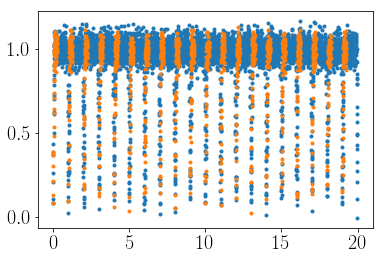

In [366]:
period_days = 1.  # period in days
cadence_minutes = 5  # cadence in minutes
radius = 9 * co.R_jup/co.R_sun  # 2 Jupiter radii in stellar radii
print(radius)
precision = 5  # percent

t, f = make_light_curve_nights(period_days, cadence_minutes, radius, precision)
plt.plot(t, f, ".")
t, f = make_light_curve_nights(period_days, cadence_minutes, radius, precision, nights=True)
plt.plot(t, f, ".")

In [428]:
rjup = co.R_jup/co.R_sun

def run_bls(porbs, radii, cadence_minutes=5, precision=5, baseline=20, nights=False):
    N = len(porbs)
    recovered = np.zeros((N))
    for i in trange(N):
        t, f = make_light_curve_nights(porbs[i], radii[i], cadence_minutes, precision, baseline=baseline,
                                       nights=nights)
        model = BoxLeastSquares(t, f, dy=precision*1e-2)
        periodogram = model.autopower(0.2)
        recovered[i] = periodogram.period[periodogram.power == max(periodogram.power)][0]
        
        # Make plots
        plt.clf()
        plt.plot(periodogram.period, periodogram.power)
        plt.axvline(porbs[i], color="tab:orange", ls="--")
        plt.title("{}".format(radii[i]/rjup))
        plt.savefig("plots/{0}".format(str(i).zfill(4)))
        plt.close()
        plt.clf()
        plt.plot(t, f, ".")
        plt.title("{}".format(radii[i]/rjup))
        plt.savefig("plots/{0}_lc".format(str(i).zfill(4)))
        plt.close()
        
    return recovered

In [468]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_plot(recovered, porbs, radii):

    success = abs(porbs - recovered)/porbs
    success_m = success < .5 
    recovered_p, recovered_r = porbs[success_m], radii[success_m]
    print(len(recovered_p), "recovered planets")
    print(len(recovered_r[recovered_r/rjup < 1.]), "planets smaller than Jupiter")
    
#     plt.plot(np.log10(porbs), radii/rjup, ".", color="tab:orange", ms=10)
#     plt.plot(np.log10(recovered_p), recovered_r/rjup, ".", color="tab:blue", ms=5)
    
    H_true, xedges, yedges = np.histogram2d(np.log10(porbs), radii/rjup, bins=5)
    H_recovered, _, _ = np.histogram2d(np.log10(recovered_p), recovered_r/rjup, bins=(xedges, yedges))
    H = H_recovered/H_true
    
    X, Y = np.meshgrid(xedges, yedges)
    plt.figure(figsize=(16, 9))
    plt.pcolormesh(X, Y, H.T, vmin=0., vmax=1.)
    plt.xlabel("$\log_{10}(\mathrm{Orbital~Period~[days]})$")
    plt.ylabel("$\mathrm{Planet~Radius~[R_J]}$")
    plt.colorbar()
    plt.savefig("completeness.pdf")
    return H

In [455]:
N = 300
porbs = 10**(np.random.uniform(-1, np.log10(30), N))
radii = np.random.uniform(.1, 2, N)*rjup

In [ ]:
recovered = run_bls(porbs, radii, cadence_minutes=3, precision=7, baseline=20, nights=True)

58 recovered planets
24 planets smaller than Jupiter


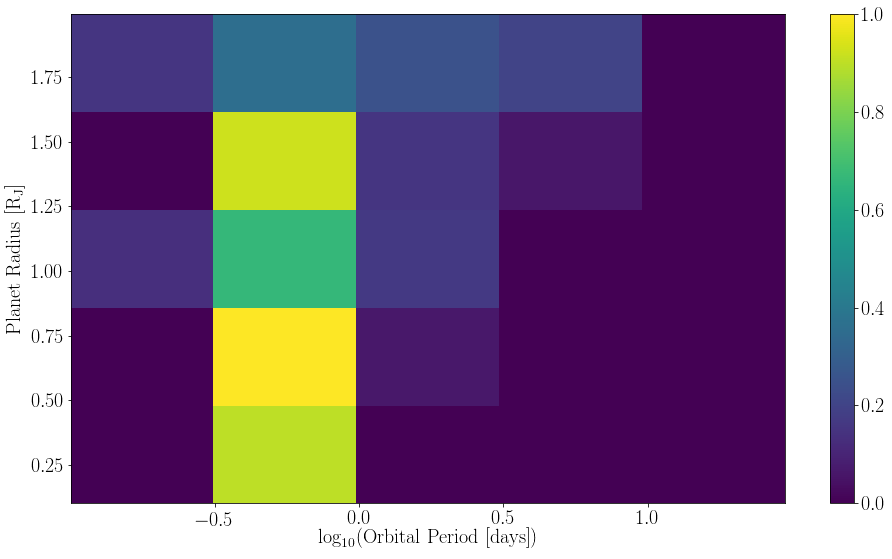

In [469]:
H = make_plot(recovered, porbs, radii)

180 sec (3 min)   7%

300 sec (5 min) 5.3%

480 sec (8 min) 4.2%

600 sec (10 min) 3.8%

100%|██████████| 300/300 [01:56<00:00,  2.57it/s]


65 recovered planets
28 planets smaller than Jupiter


array([[0.        , 0.125     , 0.13333333, 0.        , 0.15384615],
       [0.8       , 0.875     , 0.66666667, 0.76923077, 0.57142857],
       [0.30769231, 0.1875    , 0.16666667, 0.07692308, 0.3125    ],
       [0.        , 0.        , 0.        , 0.        , 0.4       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

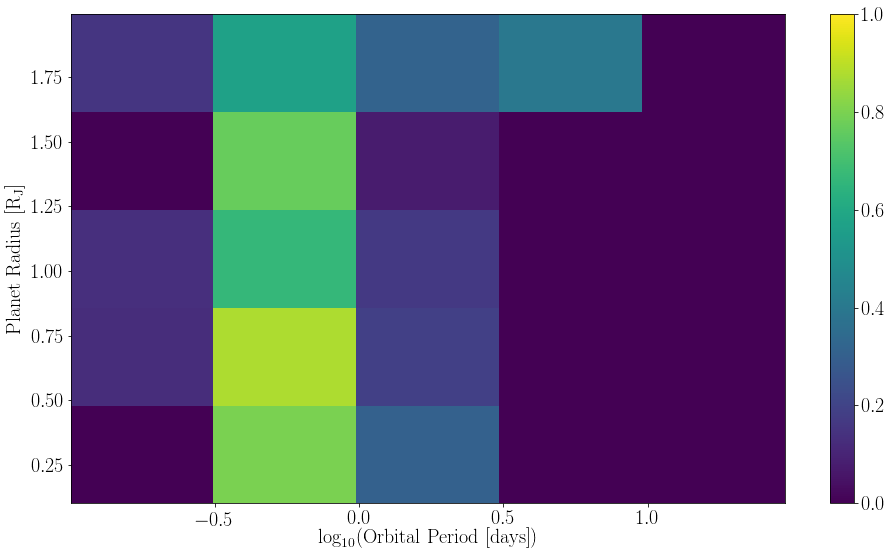

In [470]:
recovered = run_bls(porbs, radii, cadence_minutes=5, precision=5.3, baseline=20, nights=True)
make_plot(recovered, porbs, radii)

100%|██████████| 300/300 [2:24:36<00:00,  2.65it/s]     


64 recovered planets
26 planets smaller than Jupiter


array([[0.        , 0.        , 0.06666667, 0.09090909, 0.15384615],
       [0.8       , 0.75      , 0.83333333, 0.61538462, 0.35714286],
       [0.07692308, 0.25      , 0.41666667, 0.07692308, 0.375     ],
       [0.        , 0.        , 0.13333333, 0.11764706, 0.2       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

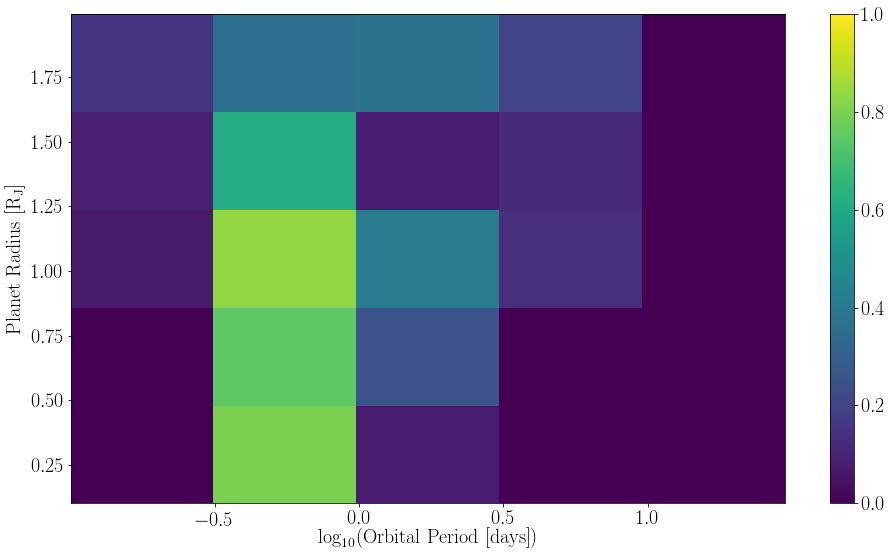

In [471]:
recovered = run_bls(porbs, radii, cadence_minutes=8, precision=4.2, baseline=20, nights=True)
make_plot(recovered, porbs, radii)

100%|██████████| 300/300 [1:58:50<00:00,  9.00s/it]   


54 recovered planets
23 planets smaller than Jupiter


array([[0.        , 0.        , 0.        , 0.        , 0.15384615],
       [0.8       , 0.875     , 0.66666667, 0.61538462, 0.35714286],
       [0.15384615, 0.1875    , 0.08333333, 0.23076923, 0.3125    ],
       [0.        , 0.        , 0.        , 0.05882353, 0.1       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

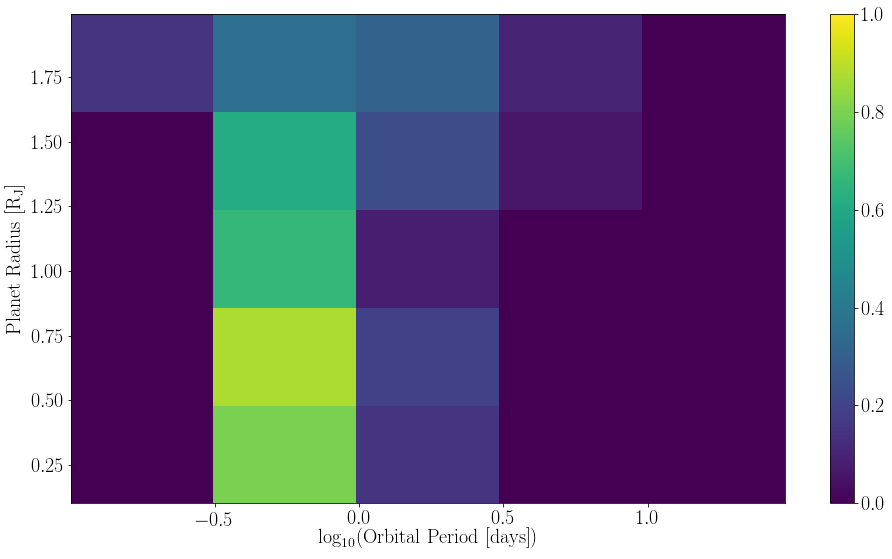

In [472]:
recovered = run_bls(porbs, radii, cadence_minutes=10, precision=3.8, baseline=20, nights=True)
make_plot(recovered, porbs, radii)